In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

图像增强：增强图像的质量

# 灰度变换

# 反色变换

output = L - input 输入图像的灰度范围为[0,L]  
**可增强暗色背景图像中的明亮区域**

In [4]:
def inverse_image(input):
    
    max_value = np.max(input)
    output = max_value - input
    return output

<ipython-input-7-0f9afe27769f>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


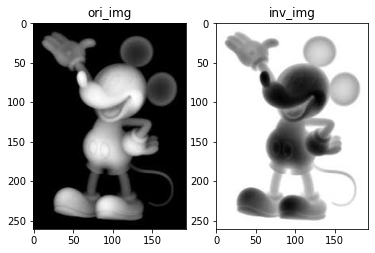

In [7]:
%matplotlib inline
grey_img = np.asarray(Image.open('./gray.jpeg').convert("L"))
inv_img = inverse_image(grey_img)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_title("ori_img")
ax1.imshow(grey_img, cmap='gray', vmin=0, vmax=255)
ax2 = fig.add_subplot(122)
ax2.set_title("inv_img")
ax2.imshow(inv_img, cmap='gray', vmin=0, vmax=255)
fig.show()


# 对数变换
**增强图像细节**  
目的：压缩图像矩阵值域的动态范围

原始图像的灰度取值范围为[x1, x2] x1, x2 > 0   
对数变换：output = log(1+input)

## 为什么要压缩动态范围 --> 如何显示一个矩阵

灰度图像的动态范围为[0, 255]  
如果矩阵的动态范围大于这一范围，可以将这一范围均匀映射到[0,255]  
如果矩阵的动态范围小于这一范围，可以将[0, 255]均匀映射到这一范围  

matplotlib的imshow(), imsave()就是运用这一方法

In [19]:
def image_log(input):
    return np.log(1+input)

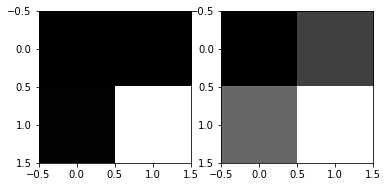

In [20]:
%matplotlib inline
input_mat =  np.array([[10, 80],[255, 25500]])
log_img = image_log(input_mat)
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(input_mat, cmap='gray', vmin=0, vmax=25500)
ax2 = fig.add_subplot(122)
ax2.imshow(log_img, cmap='gray')
plt.show()

**对数变换可以显示更多的图像细节**

## 伽马变换/幂律变换

In [1]:
def gamma_trans(input, gamma=2, eps=0):
    return 255. * (((input+eps)/255) ** gamma)

In [2]:
%matplotlib inline
from matplotlib.widgets import Slider, Button, RadioButtons

def update_gamma(val):
    gamma = slider1.val
    output = gamma_trans(input_arr, gamma)
    ax1.set_title("After Transformation, gamma = " + str(gamma))
    ax1.imshow(output, cmap='gray', vmin=0, vmax=255)
    
input_arr = np.array([[0, 50, 100, 150],
                      [0, 50, 100, 150],
                      [0, 50, 100, 150],
                      [0, 50, 100, 150]
                     ])
fig = plt.figure()
ax0 = fig.add_subplot(121)
ax0.set_title("input matrix")
ax0.imshow(input_arr, cmap='gray',vmin=0,vmax=255)

ax1 = fig.add_subplot(122)
plt.subplots_adjust(bottom=0.3)
s1 = plt.axes([0.25, 0.1, 0.55, 0.03], facecolor='lightgoldenrodyellow')
slider1 = Slider(s1, '参数gamma', 0.0, 2.0,
                 valfmt='%.f', valinit=1.0, valstep=0.1)
slider1.on_changed(update_gamma)
slider1.reset()
slider1.set_val(1)

plt.show()

NameError: name 'np' is not defined